In [1]:
suppressMessages({
    library(Seurat)
    library(SeuratWrappers)
    library(tidyverse)
    library(harmony)
    library(ggrepel)
    library(ggrastr)
    library(magrittr)
    # GO enrich use packages
    library(DOSE)
    library(clusterProfiler)
    library(org.Hs.eg.db)
    library(ggplot2)
    library(dplyr)
    library(topGO)
    library(GSEABase)
    library(stringr)
    library(RColorBrewer)
    ## RNA velocity
    library(velocyto.R)
})

# load and save vars and functions

In [2]:
suppressMessages(
    source("~/project/2020-6-18-IVDD_scRNA/scripts/R_scripts/preferable_scripts/common_use_functions.R")
)

In [3]:
options(repr.plot.width=14, repr.plot.height=10)

In [3]:
# read in AF and progenitors Seurat Object
afe <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/AF/new_noC03_AFandPro_SeuratObj.Rds")

In [12]:
Idents(afe) %>% unique()

[1] HTAF             Inner AF         Outer AF         HomAF           
[5] MCAM+ progenitor RegAF            proAF           
Levels: HTAF Inner AF HomAF proAF RegAF Outer AF MCAM+ progenitor

In [12]:
afe.color.df <- data.frame(celltype=levels(Idents(afe)),
                           color = brewer.pal(length(unique(Idents(afe))), "Set2"),
                           stringsAsFactors = F)

In [14]:
saveRDS(afe.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/AF/color_set/AF_and_pro_color_df.Rds")

In [17]:
afe.color.df <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/AF/color_set/AF_and_pro_color_df.Rds")

In [15]:
write.table(afe.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/AF/color_set/AF_and_pro_color_df.txt",
            sep = '\t', row.names=F, quote=F)

# test ratio

In [4]:
Idents(afe) %>% unique()

[1] HTAF             Inner AF         Outer AF         HomAF           
[5] MCAM+ progenitor RegAF            proAF           
Levels: HTAF Inner AF HomAF proAF RegAF Outer AF MCAM+ progenitor

In [5]:
celltype.sample.count <- table(afe$sample_name, Idents(afe)) %>% as.data.frame()
colnames(celltype.sample.count) <- c("sample", "celltype", "cell.num")

celltype.sample.count <- celltype.sample.count %>% group_by(sample) %>% do({
    df <- .
    df$ratio <- df$cell.num / sum(df$cell.num) * 100
    df
})

celltype.sample.count$sample <- as.character(celltype.sample.count$sample)
celltype.sample.count$celltype <- as.character(celltype.sample.count$celltype)
celltype.sample.count$grade <- substr(celltype.sample.count$sample, start=1, stop=2)

In [7]:
celltype.sample.count

sample,celltype,cell.num,ratio,grade
<chr>,<chr>,<int>,<dbl>,<chr>
D1_1,HTAF,7,4.7945205,D1
D1_1,Inner AF,37,25.3424658,D1
D1_1,HomAF,11,7.5342466,D1
D1_1,proAF,0,0.0000000,D1
D1_1,RegAF,10,6.8493151,D1
D1_1,Outer AF,56,38.3561644,D1
D1_1,MCAM+ progenitor,25,17.1232877,D1
D1_2,HTAF,6,1.7291066,D1
D1_2,Inner AF,127,36.5994236,D1


In [8]:
# HTAF
d1.HTAF <- celltype.sample.count %>% filter(celltype == "HTAF" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.HTAF <- celltype.sample.count %>% filter(celltype == "HTAF" & grade != "D1") %>% `[`("ratio") %>% unlist()

# proAF
d1.proAF <- celltype.sample.count %>% filter(celltype == "proAF" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.proAF <- celltype.sample.count %>% filter(celltype == "proAF" & grade != "D1") %>% `[`("ratio") %>% unlist()

# EffectorNP
d1.inF <- celltype.sample.count %>% filter(celltype == "Inner AF" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.inF <- celltype.sample.count %>% filter(celltype == "Inner AF" & grade != "D1") %>% `[`("ratio") %>% unlist()

In [11]:
wilcox.test(d1.inF, dg.inF,  alternative = "greater")


	Wilcoxon rank sum exact test

data:  d1.inF and dg.inF
W = 20, p-value = 0.0989
alternative hypothesis: true location shift is greater than 0


# plot AF and MCAM+ progenitors

## plot UMAP

In [18]:
afe.color <- structure(afe.color.df$color, names=afe.color.df$celltype)

In [19]:
afe.color

HTAF         Inner AF            HomAF            proAF 
       "#66C2A5"        "#FC8D62"        "#8DA0CB"        "#E78AC3" 
           RegAF         Outer AF MCAM+ progenitor 
       "#A6D854"        "#FFD92F"        "#E5C494"

In [17]:
afe.color

HTAF         Inner AF            HomAF            proAF 
       "#66C2A5"        "#FC8D62"        "#8DA0CB"        "#E78AC3" 
           RegAF         Outer AF MCAM+ progenitor 
       "#A6D854"        "#FFD92F"        "#E5C494"

In [18]:
A.plot <- 
  plot.seu.raster(afe)+ NoLegend() +
    scale_color_manual(values = afe.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

A.plot <- LabelClusters(A.plot, id = "ident", size = 5, repel = T, color="black")

In [21]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_AF_pro_subcelltype_UMAP.pdf", width=9)
A.plot
dev.off()

png 
  2

## plot cell counts

In [22]:
afe.count <- table(Idents(afe), afe@meta.data$orig.ident) %>% as.data.frame()
colnames(afe.count) <- c("cell.type", "grade", "cell.num")

afe.count <- 
    afe.count %>% group_by(grade) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

In [24]:
subcelltype.ratio.bar <- 
  afe.count %>% 
    ggplot() +
    geom_bar(aes(x=grade, y=cell.ratio, fill=cell.type), stat = "identity") +
      scale_fill_manual(values = afe.color) + 
      scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%")) +
      labs(x="", y="", fill="Cell Type") + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title = element_text(size = 25),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 25))

In [26]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig3_AF_pro_subcelltype_ratio_bar.pdf")
subcelltype.ratio.bar
dev.off()

png 
  2

## plot heatmap

In [27]:
af.markers <- read.csv("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/AF/AF_and_progenitors_markers.csv")

In [30]:
af.markers %>%
  group_by(cluster) %>%
  top_n(n = 10, wt = avg_log2FC) -> top10

In [31]:
subcelltype.heatmap <- 
  DoHeatmap(afe, 
            features = top10$gene, 
            #cells = random.cells, 
            label = F,
             group.colors = afe.color)

In [33]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_FigS3_AF_pro_subcelltype_heatmap.pdf", height=15,width=20)
subcelltype.heatmap
dev.off()

png 
  2

## FeaturePlot

In [34]:
plot.list <- 
    FeaturePlot.ggrastr(afe, 
                        features =  c("COL1A1","COL2A1", "MMP2","ACAN"), 
                        cols = c("lightgrey", "orangered3"), 
                        combine = FALSE,
                        raster = TRUE,
                        pt.size = 1)

In [35]:
for (i in seq(length(plot.list))) {
  plot.list[[i]] <- plot.list[[i]] + NoAxes() + NoLegend() +
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))
}

In [39]:
pdf(file = "~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig3_AF_pro_subcelltypefeatureplot.pdf", width = 19, height = 15)
cowplot::plot_grid(plotlist = plot.list, align = "hv", nrow = 2, ncol=2)
dev.off()

png 
  2

## plot compareGO

In [40]:
afe.comp.GO <- getCompareClusterGO(af.markers)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(cluster.genes[[j]], fromType = "SYMBOL", toType = c("ENTREZID", :
“1.33% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(cluster.genes[[j]], fromType = "SYMBOL", toType = c("ENTREZID", :
“3.26% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(cluster.genes[[j]], fromType = "SYMBOL", toType = c("ENTREZID", :
“0.6% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(cluster.genes[[j]], fromType = "SYMBOL", toType = c("ENTREZID", :
“2.6% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(cluster.genes[[j]], fromType = "SYMBOL", toType = c("ENTREZID", :
“3.88% of input gene IDs are fail to map...”
'select()' returned 1:

In [59]:
afe.comp.GO <- setReadable(afe.comp.GO, OrgDb = org.Hs.eg.db, keyType="ENTREZID")

In [63]:
afe.comp.GO@compareClusterResult %>% filter(., Cluster %in% c("MCAM+ progenitor") & grepl("dev", Description))

Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
MCAM+ progenitor,GO:0001655,urogenital system development,33/615,330/18866,1.208356e-08,1.385869e-06,1.012415e-06,COL4A1/NOTCH3/ACTA2/ANGPT2/ENPEP/PGF/PDGFRB/MMP9/JAG1/NID1/NRP1/PDGFA/SERPINF1/ARID5B/PTEN/FKBP4/AGT/MEF2C/NOTCH1/ID4/ADAMTS1/ID3/GDF11/SMARCC1/KANK2/ASXL1/ANGPT1/HES1/TNS2/CDKN1B/MYC/TIPARP/SOX4,33
MCAM+ progenitor,GO:0072001,renal system development,28/615,292/18866,3.696699e-07,2.171585e-05,1.586401e-05,COL4A1/NOTCH3/ACTA2/ANGPT2/ENPEP/PGF/PDGFRB/MMP9/JAG1/NID1/NRP1/PDGFA/SERPINF1/ARID5B/AGT/MEF2C/NOTCH1/ADAMTS1/ID3/GDF11/KANK2/ASXL1/ANGPT1/HES1/TNS2/MYC/TIPARP/SOX4,28
MCAM+ progenitor,GO:0030900,forebrain development,33/615,391/18866,6.577259e-07,3.381115e-05,2.469995e-05,NOTCH3/NR2F2/PRKG1/ZEB2/SSTR2/DLC1/SYNE2/NRP1/PTEN/ETS1/B2M/TACC1/C12orf57/NR4A3/NOTCH1/FLNA/AXL/NTRK2/UBB/ID4/PAFAH1B1/ARPC5/LAMB1/FYN/EXT1/HOOK3/TRA2B/HES1/DLX5/ARID1A/PTN/DNAJB1/BTG2,33
MCAM+ progenitor,GO:0001822,kidney development,27/615,283/18866,6.593372e-07,3.381115e-05,2.469995e-05,NOTCH3/ACTA2/ANGPT2/ENPEP/PGF/PDGFRB/MMP9/JAG1/NID1/NRP1/PDGFA/SERPINF1/ARID5B/AGT/MEF2C/NOTCH1/ADAMTS1/ID3/GDF11/KANK2/ASXL1/ANGPT1/HES1/TNS2/MYC/TIPARP/SOX4,27
MCAM+ progenitor,GO:0032835,glomerulus development,12/615,64/18866,9.019338e-07,4.344615e-05,3.173858e-05,NOTCH3/ACTA2/ANGPT2/ENPEP/PDGFRB/JAG1/NID1/MEF2C/NOTCH1/ASXL1/ANGPT1/HES1,12
MCAM+ progenitor,GO:0060840,artery development,15/615,102/18866,1.066097e-06,5.034697e-05,3.677981e-05,NOTCH3/TBX2/ADGRF5/APOE/PDGFRB/JAG1/NRP1/PRRX1/MYLK/HEY1/NOTCH1/PLXND1/LUZP1/HES1/SOX4,15
MCAM+ progenitor,GO:0061437,renal system vasculature development,8/615,28/18866,2.125761e-06,8.904165e-05,6.504731e-05,NOTCH3/ACTA2/ANGPT2/PDGFRB/NRP1/NOTCH1/ANGPT1/HES1,8
MCAM+ progenitor,GO:0061440,kidney vasculature development,8/615,28/18866,2.125761e-06,8.904165e-05,6.504731e-05,NOTCH3/ACTA2/ANGPT2/PDGFRB/NRP1/NOTCH1/ANGPT1/HES1,8
MCAM+ progenitor,GO:0048608,reproductive structure development,33/615,443/18866,9.760829e-06,2.884535e-04,2.107230e-04,NR2F2/EPAS1/PDGFRB/SLIT3/SERPINF1/ARID5B/PTEN/PTK2/FKBP4/KITLG/HEY1/ZFP36L1/NOTCH1/FLNA/AXL/PHLDA2/UBB/NASP/TRIM28/ID4/ADAMTS1/SMARCC1/ARID4B/CEBPB/ASH1L/HES1/ARID1A/HSP90AB1/CDKN1B/PTN/TIPARP/TPPP3/JUNB,33


In [60]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure_3_AF_subcelltype_GO_compare_test.pdf", width = 15, height = 40)
dotplot(afe.comp.GO, showCategory=30)
dev.off()

png 
  2

In [78]:
select.GO <- 
    c("interleukin−1−mediated signaling pathway", "response to decreased oxygen levels", "response to hypoxia", "intrinsic apoptotic signaling pathway", "response to tumor necrosis factor",
      "NIK/NF−kappaB signaling", "regulation of vasculature development", "ossification", "regulation of hemopoiesis", "positive regulation of cell adhesion", "cartilage development",
      "fat cell differentiation", "reproductive structure development", "collagen fibril organization", "bone development", "chondrocyte differentiation", "cartilage condensation", 
      "response to metal ion", "proteoglycan metabolic process", "actin filament organization", "regulation of cell−substrate adhesion", "maintenance of protein location", 
      "positive regulation of supramolecular fiber organization", "collagen metabolic process", "cellular response to transforming growth factor beta stimulus", "extracellular matrix disassembly",
      "cell−matrix adhesion", "cell growth", "muscle system process", "embryonic organ development", "inclusion body assembly", "activation of MAPKKK activity", "regulation of fat cell differentiation",
      "p38MAPK cascade", "circadian rhythm", "regulation of endothelial cell proliferation", "cellular response to type I interferon", "mesenchyme development", "muscle cell development", 
      "mesenchymal cell development", "urogenital system development", "stem cell development", "endoderm development")

In [80]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure_3_AF_subcelltype_GO_compare.pdf", height = 10,width = 12)
dotplot.compareClusterResult.select(afe.comp.GO, select_term = select.GO) +
  theme(axis.text.x = element_text(angle=45, hjust = 1))
dev.off()

png 
  2

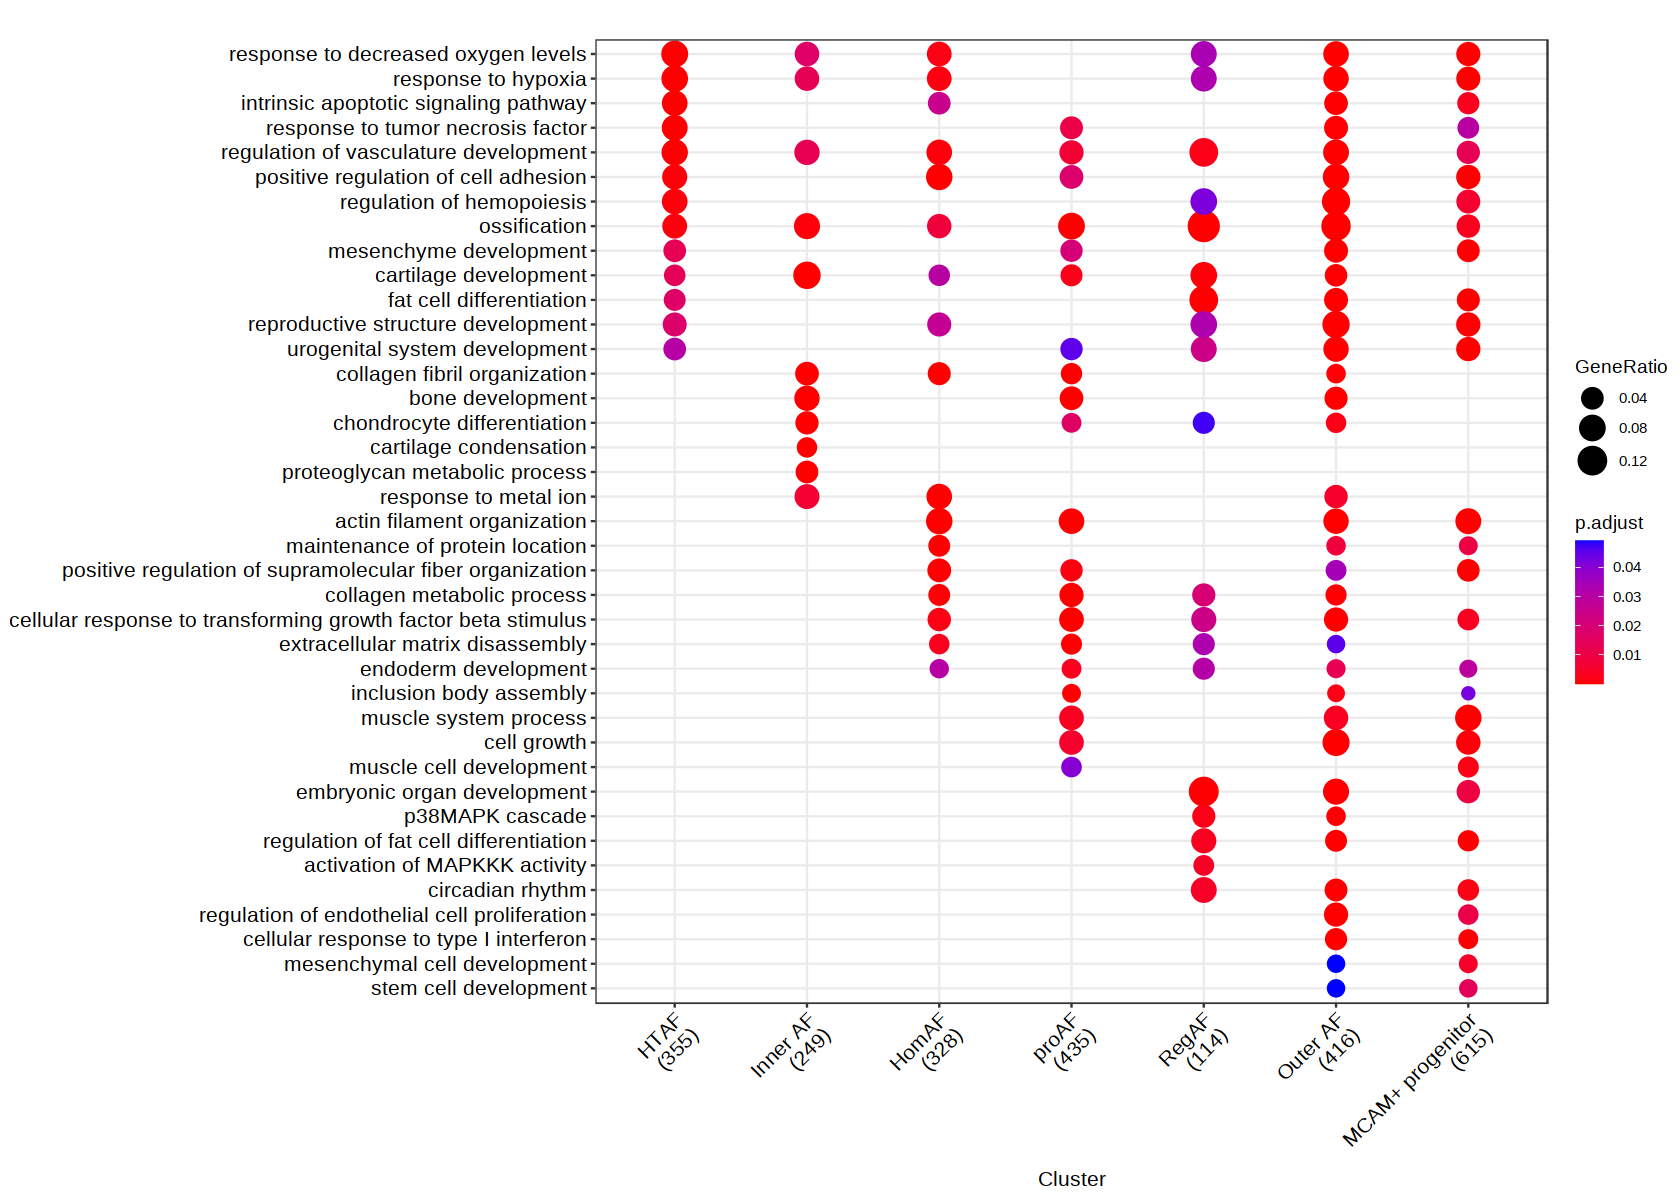

In [79]:
dotplot.compareClusterResult.select(afe.comp.GO, select_term = select.GO) +
  theme(axis.text.x = element_text(angle=45, hjust = 1))

## GSEA of MCAM+ progenitor

In [46]:
library(msigdbr)

In [ ]:
m_df <- msigdbr(species = "Homo sapiens")

In [47]:
H_t2g <- msigdbr(species = "Homo sapiens", category = "H") %>% 
  dplyr::select(gs_name, entrez_gene)

In [ ]:
mcam.genes <- FindMarkers(afe, ident.1 = "MCAM+ progenitor", test.use = "MAST")

In [48]:
mcam.genes <- mcam.genes %>% filter(., p_val_adj < 0.05)

In [49]:
mcam.gsea <- 
    GSEA.celltype(celltype.marker.df = mcam.genes,
                  enrich.ref = H_t2g)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(celltype.marker.df), fromType = "SYMBOL", toType = c("ENTREZID", :
“2.2% of input gene IDs are fail to map...”
preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (9.61% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
leading edge analysis...

done...



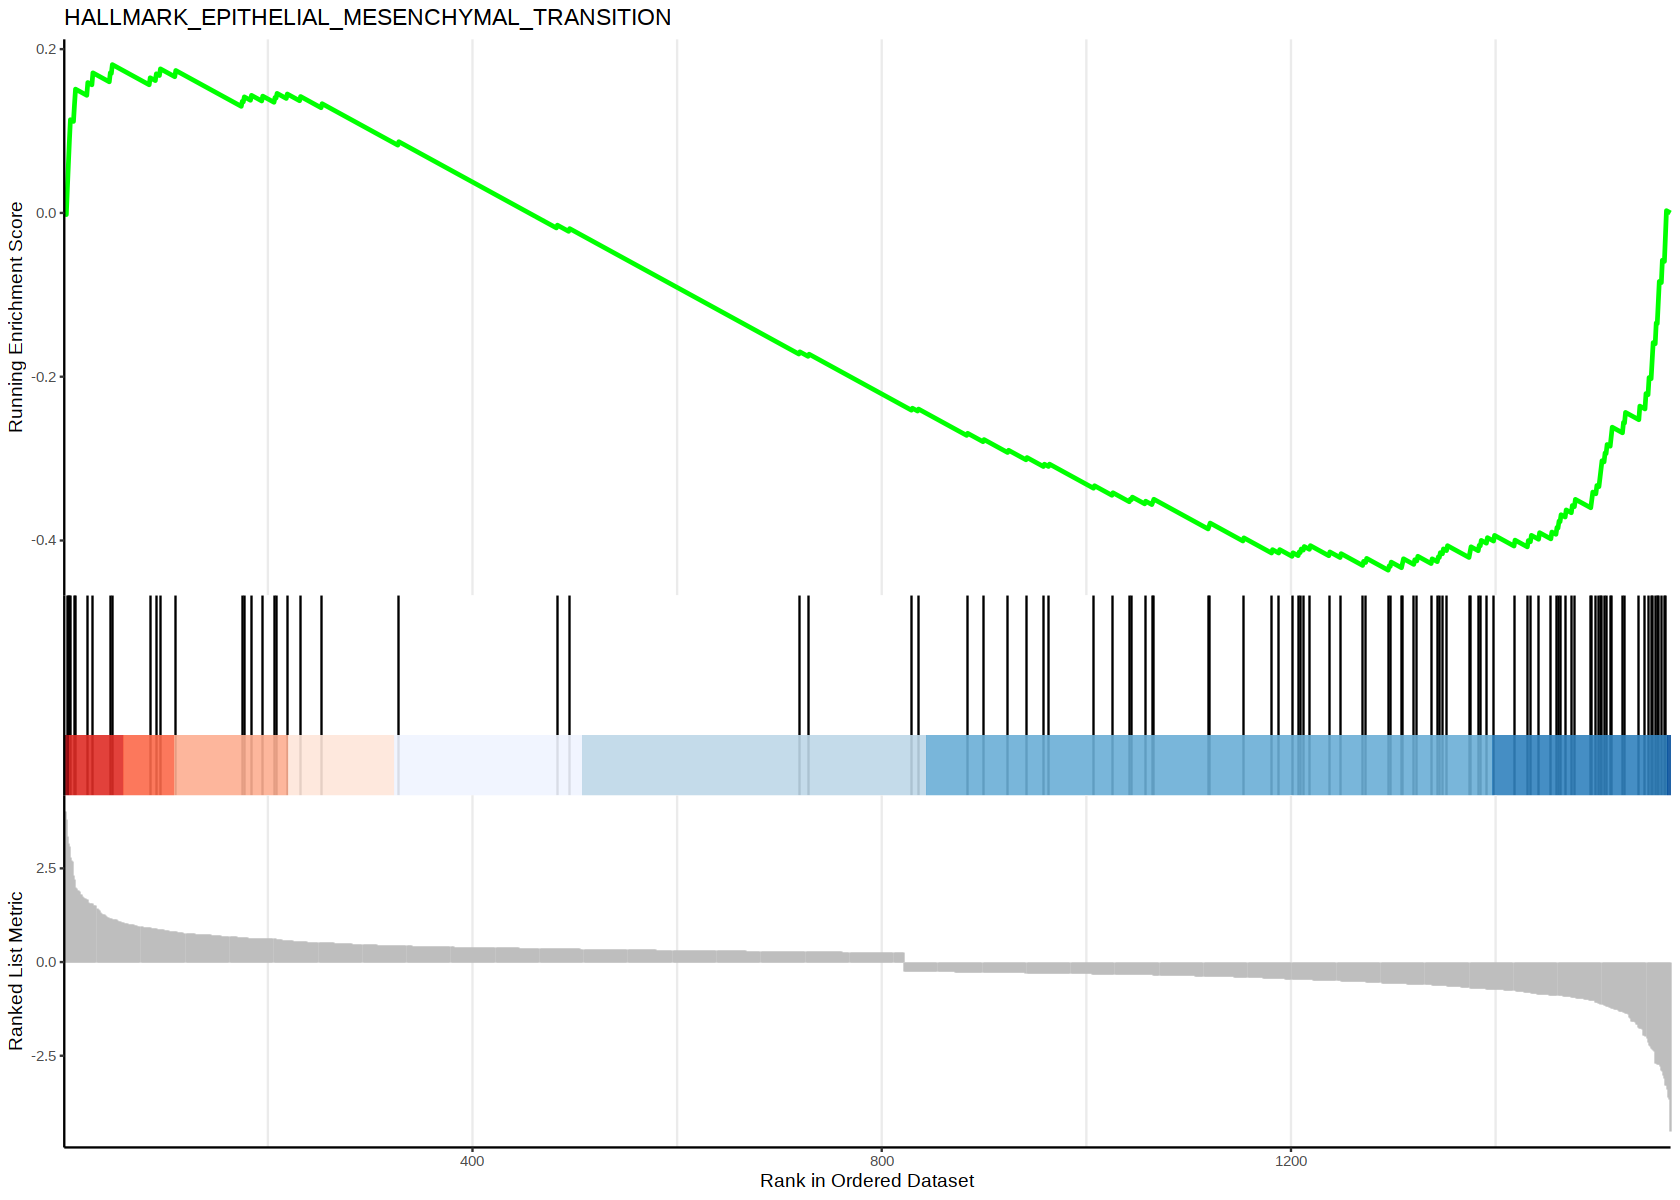

In [52]:
enrichplot::gseaplot2(mcam.gsea, geneSetID = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION", title = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

In [54]:
celltype.marker.df <- mcam.genes
# 1. trans gene name to ENTREZID
keep.entrezID <- bitr(rownames(celltype.marker.df), fromType = "SYMBOL", toType = c("ENTREZID", "ENSEMBL"), OrgDb = "org.Hs.eg.db")
# 2. filter marker.df 
celltype.marker.df <- celltype.marker.df[keep.entrezID$SYMBOL,]
genes.list <- structure(unlist(celltype.marker.df$avg_log2FC), names=rownames(celltype.marker.df))
# 
genes.list <- genes.list[order(genes.list, decreasing = T)]
names(genes.list) <- keep.entrezID$ENTREZID[match(names(genes.list), keep.entrezID$SYMBOL)]

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(celltype.marker.df), fromType = "SYMBOL", toType = c("ENTREZID", :
“2.2% of input gene IDs are fail to map...”


In [56]:
gseGO.re <- gseGO(genes.list, OrgDb = org.Hs.eg.db)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (9.61% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
leading edge analysis...

done...



# plot some gene expression

In [9]:
library(ggpubr)

In [10]:
select.genes <- c("MCAM", "COL2A1", "SOD2")

In [13]:
select.exp <- afe@assays$RNA@data[select.genes, ] %>% as.matrix() %>% as.data.frame()

In [14]:
select.exp <- t(select.exp) %>% as.data.frame()
select.exp$celltype <- Idents(afe)[rownames(select.exp)]
df <- reshape2::melt(select.exp, id=c("celltype"))

In [22]:
colnames(df)[2:3] <- c("gene", "exp")

In [23]:
box.p <- 
    facet(ggboxplot(df, x="celltype", y="exp", color="celltype", ylab = "Normalized Expression") + theme_bw() + 
          theme(axis.text.x = element_blank()) +
         scale_color_manual(values=afe.color), facet.by = "gene", ncol = 1)

In [25]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig3_AF_E_some_gene_boxplot.pdf")
box.p
dev.off()

png 
  2